# Simple Linear Regression

y=mx+c
y -> 1 dependent
x -> 1 independent

# 1. Extract Data

In [1]:
import pandas as pd
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\ML Practice\\Dataset\\Machine Learning A-Z (Codes and Datasets)\\Part 2 - Regression\\Section 4 - Simple Linear Regression\\Python\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 2. EDA(Explanatory data analysis)

In [2]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 3. Feature Extraction or engineering

In [5]:
x=data.iloc[:,:-1]  # data["YearsExperience"]
y=data.iloc[:,-1]   # data["Salary"]

In [6]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [7]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


# 4. Model Building

In [9]:
# 4.1 Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)
print("x_test shape : ",x_test.shape)

x_train shape :  (21, 1)
y_train shape :  (21,)
y_test shape :  (9,)
x_test shape :  (9, 1)


In [10]:
# 4.2 Train the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# 5. Predicting the model

In [11]:
test_acc=model.score(x_test,y_test)
print("Testing accuracy : ",test_acc)

0.9414466227178214


In [12]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
train_acc=model.score(x_train,y_train)
print("Training accuracy : ",train_acc)

mae=mean_absolute_error(y_test,model.predict(x_test))
print("Mean Absolute error : ",mae)

mse=mean_squared_error(y_test,model.predict(x_test))
print("Mean Squared error : ", mse)

rmse=np.sqrt(mse)
print("Root mean squared error : ",rmse)

Training accuracy :  0.9574526669392872
Mean Absolute error :  5161.328710400183
Mean Squared error :  37784662.46621314
Root mean squared error :  6146.92300799458


# 6.Visulaize the results

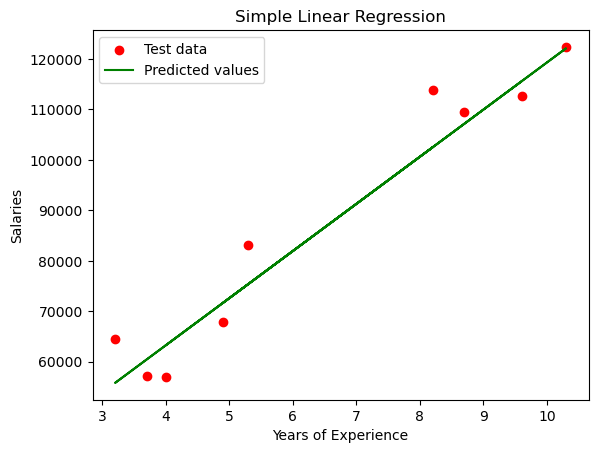

In [17]:
import matplotlib.pyplot as plt
plt.title("Simple Linear Regression")
plt.ylabel("Salaries")
plt.xlabel("Years of Experience")
plt.scatter(x_test,y_test,color='red',label="Test data")  # Raw
plt.plot(x_test,model.predict(x_test),color='green',label="Predicted values")  # Predicted
plt.legend()
plt.show()